In [131]:
import pymysql
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter

conn=pymysql.connect(host='localhost', user='root', password='1234', db='population', charset='utf8')
cur = conn.cursor()
query='select * from (select local,govern, sum(2013년) as sum_2013, sum(2014년),sum(2015년),sum(2016년),sum(2017년),sum(2018년),sum(2019년),sum(2020년),sum(2021년),sum(2022년) from school where class1 = "학생수 (명)" group by local, govern) as govern_table where govern=%s and sum_2013 != 0;'

# 국립 : 정부, 교육부 직할 (National)
# 공립 : 지방자치단체, 교육부 산하 (Public)

cur.execute(query,"사립")
rows=cur.fetchall() # 사립 학교 학생 수
private=pd.DataFrame(rows) # DataFrame으로 변환
cur.execute(query,"공립")
rows=cur.fetchall() # 공립 학교 학생 수
public=pd.DataFrame(rows) # DataFrame으로 변환
cur.execute(query,"국립")
rows=cur.fetchall() # 국립 학교 학생 수
national=pd.DataFrame(rows) # DataFrame으로 변환


In [132]:
private.set_index(0, inplace=True)

In [133]:
private

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
총계,사립,12832.0,13898.0,14094.0,13678.0,13854.0,14910,15198,15292.0,15044.0,14782.0
서울,사립,5354.0,5302.0,5294.0,5216.0,5220.0,5152,5096,4912.0,4700.0,4712.0
인천,사립,74.0,90.0,88.0,90.0,88.0,88,86,86.0,80.0,62.0
광주,사립,918.0,1330.0,1320.0,1274.0,1220.0,1178,1186,1186.0,1164.0,1176.0
대전,사립,186.0,124.0,98.0,108.0,258.0,262,250,200.0,172.0,148.0
경기,사립,2990.0,3548.0,3654.0,3560.0,3640.0,3904,4120,4316.0,4352.0,4434.0
충북,사립,974.0,1070.0,1078.0,1010.0,1168.0,1168,1176,1076.0,1084.0,868.0
경북,사립,2336.0,2394.0,2464.0,2334.0,2198.0,2870,2958,3012.0,3022.0,2926.0


In [134]:
add1=private.loc["총계"][1:].reset_index(drop=True)

In [135]:
private.index[1]

'서울'

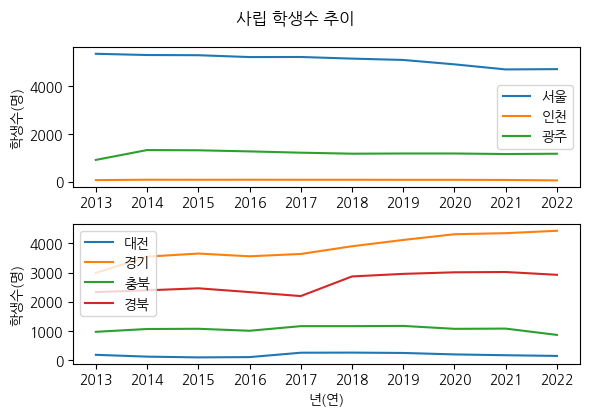

'\n서울 지역:\n\n성균관대학교 (Sungkyunkwan University)\n연세대학교 (Yonsei University)\n이화여자대학교 (Ewha Womans University)\n중앙대학교 (Chung-Ang University)\n부산 지역:\n\n동아대학교 (Dong-A University)\n대전 지역:\n\n계명대학교 (Keimyung University)\n대구 지역:\n\n경북대학교 (Kyungpook National University) - 국립대학이지만 사립적 특성을 가지고 있습니다.\n대구가톨릭대학교 (Catholic University of Daegu)\n광주 지역:\n\n조선대학교 (Chosun University)\n인천 지역:\n\n인하대학교 (Inha University)\n대전 지역:\n\n한남대학교 (Hannam University)\n전북 지역:\n\n전북대학교 (Chonbuk National University) - 국립대학이지만 사립적 특성을 가지고 있습니다.\n경기 지역:\n\n경기대학교 (Kyonggi University)\n제주 지역:\n\n한림대학교 (Hallym University)'

In [136]:
plt.figure(figsize=(6,4))
ax=plt.subplot2grid((2,2),(0,0),colspan=2, rowspan=1)
for idx in private.index[1:4]:
    plt.plot(range(10), private.loc[idx][1:], label=idx)
plt.legend()
plt.ylabel("학생수(명)")

plt.subplot2grid((2,2),(1,0),colspan=2, rowspan=1, sharex=ax)
for idx in private.index[4:]:
    plt.plot(range(10), private.loc[idx][1:], label=idx)
plt.legend(loc=2)
plt.suptitle("사립 학생수 추이")
plt.tight_layout()
plt.xlabel("년(연)")
plt.ylabel("학생수(명)")
plt.xticks(range(10), [i for i in range(2013,2023)])
plt.show()
'''
서울 지역:

성균관대학교 (Sungkyunkwan University)
연세대학교 (Yonsei University)
이화여자대학교 (Ewha Womans University)
중앙대학교 (Chung-Ang University)
부산 지역:

동아대학교 (Dong-A University)
대전 지역:

계명대학교 (Keimyung University)
대구 지역:

경북대학교 (Kyungpook National University) - 국립대학이지만 사립적 특성을 가지고 있습니다.
대구가톨릭대학교 (Catholic University of Daegu)
광주 지역:

조선대학교 (Chosun University)
인천 지역:

인하대학교 (Inha University)
대전 지역:

한남대학교 (Hannam University)
전북 지역:

전북대학교 (Chonbuk National University) - 국립대학이지만 사립적 특성을 가지고 있습니다.
경기 지역:

경기대학교 (Kyonggi University)
제주 지역:

한림대학교 (Hallym University)'''

In [137]:
public

,0,1,2,3,4,5,6,7,8,9,10,11
0,총계,공립,1906.0,1810.0,1784.0,1512.0,752.0,1038,1266,1492.0,1808.0,2326.0
1,서울,공립,158.0,208.0,214.0,216.0,216.0,224,224,238.0,238.0,232.0
2,부산,공립,714.0,696.0,692.0,522.0,0.0,0,92,96.0,100.0,108.0
3,대구,공립,492.0,500.0,482.0,466.0,0.0,136,180,190.0,218.0,226.0
4,인천,공립,154.0,8.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
5,대전,공립,388.0,316.0,246.0,110.0,104.0,94,88,100.0,84.0,58.0


In [138]:
add2=public.loc[0][2:].reset_index(drop=True)

In [139]:
public.set_index(0, inplace=True)

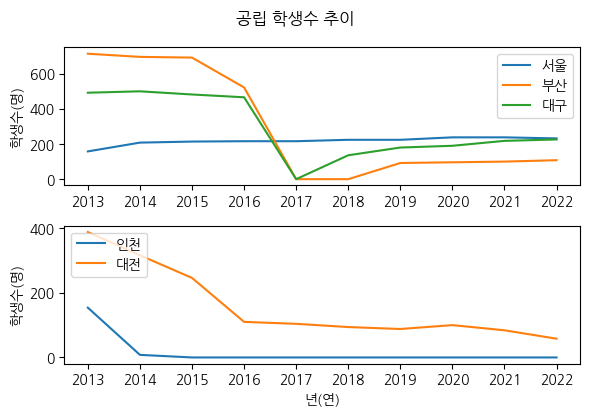

'\n서울 지역:\n\n서울과학기술대학교 (Seoul Science High School)\n서울시립대학교 (University of Seoul)\n부산 지역:\n\n부경대학교 (Pukyong National University)\n대전 지역:\n\n대전대학교 (Daejeon University of Science and Technology)\n강원 지역:\n\n강릉원주대학교 (Gangneung-Wonju National University)\n광주 지역:\n\n조선대학교 (Chosun University)\n인천 지역:\n\n인천대학교 (Incheon National University)\n대구 지역:\n\n대구경북과학기술원 (Daegu Gyeongbuk Institute of Science and Technology)\n전북 지역:\n\n전북대학교 (Chonbuk National University)\n제주 지역:\n\n제주대학교 (Jeju National University)\n경북 지역:\n\n경북대학교 (Kyungpook National University)'

In [140]:
plt.figure(figsize=(6,4))
ax=plt.subplot2grid((2,2),(0,0),colspan=2, rowspan=1)
for idx in public.index[1:4]:
    plt.plot(range(10), public.loc[idx][1:], label=idx)
plt.legend()
plt.ylabel("학생수(명)")

plt.subplot2grid((2,2),(1,0),colspan=2, rowspan=1, sharex=ax)
for idx in public.index[4:]:
    plt.plot(range(10), public.loc[idx][1:], label=idx)
plt.legend(loc=2)
plt.suptitle("공립 학생수 추이")
plt.tight_layout()
plt.xlabel("년(연)")
plt.ylabel("학생수(명)")
plt.xticks(range(10), [i for i in range(2013,2023)])
plt.show()
'''
서울 지역:

서울과학기술대학교 (Seoul Science High School)
서울시립대학교 (University of Seoul)
부산 지역:

부경대학교 (Pukyong National University)
대전 지역:

대전대학교 (Daejeon University of Science and Technology)
강원 지역:

강릉원주대학교 (Gangneung-Wonju National University)
광주 지역:

조선대학교 (Chosun University)
인천 지역:

인천대학교 (Incheon National University)
대구 지역:

대구경북과학기술원 (Daegu Gyeongbuk Institute of Science and Technology)
전북 지역:

전북대학교 (Chonbuk National University)
제주 지역:

제주대학교 (Jeju National University)
경북 지역:

경북대학교 (Kyungpook National University)'''

In [141]:
# 20년 뒤 수도권대, 지방국립대 생존 : https://www.unipress.co.kr/news/articleView.html?idxno=5334
# 대학교 통폐합 움직임 : https://www.yna.co.kr/view/AKR20221216114400061
# 대전대학교 인구 감소 : https://www.daejonilbo.com/news/articleView.html?idxno=2103411
# 수도권 대학 정원 23년만에 늘려 : https://blog.naver.com/k-hjmath/223129199330 + 석사,박사 증원

In [142]:
add3=national.loc[0][2:].reset_index(drop=True)

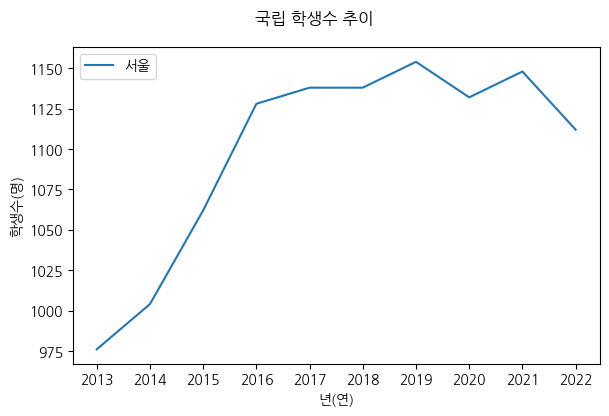

'\n서울 지역:\n\n서울대학교 (Seoul National University, SNU)\n한양대학교 (Hanyang University)\n고려대학교 (Korea University)\n연세대학교 (Yonsei University)\n대전 지역:\n\n한국과학기술원 (Korea Advanced Institute of Science and Technology, KAIST)\n대전대학교 (Daejeon University)\n대구 지역:\n\n경북대학교 (Kyungpook National University)\n부산 지역:\n\n부산대학교 (Pusan National University)\n광주 지역:\n\n전남대학교 (Chonnam National University)\n충북 지역:\n\n충북대학교 (Chungbuk National University)\n강원 지역:\n\n강원대학교 (Kangwon National University)\n인천 지역:\n\n인하대학교 (Inha University)\n전북 지역:\n\n전북대학교 (Chonbuk National University)\n경남 지역:\n\n경남대학교 (Kyungnam University)'

In [143]:
national.set_index(0, inplace=True)
plt.figure(figsize=(6,4))

plt.plot(range(10), national.loc["서울"][1:], label="서울")
plt.legend(loc=2)
plt.suptitle("국립 학생수 추이")
plt.tight_layout()
plt.xlabel("년(연)")
plt.ylabel("학생수(명)")
plt.xticks(range(10), [i for i in range(2013,2023)])
plt.show()

'''
서울 지역:

서울대학교 (Seoul National University, SNU)
한양대학교 (Hanyang University)
고려대학교 (Korea University)
연세대학교 (Yonsei University)
대전 지역:

한국과학기술원 (Korea Advanced Institute of Science and Technology, KAIST)
대전대학교 (Daejeon University)
대구 지역:

경북대학교 (Kyungpook National University)
부산 지역:

부산대학교 (Pusan National University)
광주 지역:

전남대학교 (Chonnam National University)
충북 지역:

충북대학교 (Chungbuk National University)
강원 지역:

강원대학교 (Kangwon National University)
인천 지역:

인하대학교 (Inha University)
전북 지역:

전북대학교 (Chonbuk National University)
경남 지역:

경남대학교 (Kyungnam University)'''

In [144]:
# 학령인구 감소 대처 방안 확보 : https://news.unn.net/news/articleView.html?idxno=519379

In [145]:
query='select local, class2, sum(2013년), sum(2014년),sum(2015년),sum(2016년),sum(2017년),sum(2018년),sum(2019년),sum(2020년),sum(2021년),sum(2022년)  from school where class2 in ("교원수","직원수") group by local, class2;'

# 국립 : 정부, 교육부 직할 (National)
# 공립 : 지방자치단체, 교육부 산하 (Public)

cur.execute(query)
rows=cur.fetchall() # 교원수, 직원수
people=pd.DataFrame(rows) # DataFrame으로 변환

In [146]:
people

,0,1,2,3,4,5,6,7,8,9,10,11
0,총계,교원수,752.0,923.0,964.0,998.0,1102.0,1214,1309,1385.0,1475.0,1525.0
1,총계,직원수,162.0,174.0,184.0,202.0,209.0,243,268,277.0,283.0,286.0
2,서울,교원수,343.0,385.0,393.0,414.0,441.0,441,449,453.0,456.0,466.0
3,서울,직원수,74.0,77.0,74.0,70.0,75.0,79,81,75.0,71.0,75.0
4,부산,교원수,26.0,27.0,35.0,34.0,31.0,31,51,54.0,54.0,47.0
5,부산,직원수,6.0,7.0,7.0,7.0,6.0,6,10,9.0,9.0,9.0
6,대구,교원수,20.0,20.0,20.0,22.0,38.0,74,77,80.0,90.0,87.0
7,대구,직원수,0.0,0.0,0.0,0.0,2.0,7,8,8.0,7.0,8.0
8,인천,교원수,79.0,81.0,85.0,89.0,90.0,88,91,81.0,86.0,93.0
9,인천,직원수,15.0,15.0,16.0,15.0,14.0,13,14,13.0,14.0,11.0


In [147]:
div1=people.loc[0][2:].reset_index(drop=True)

In [148]:
# 총계 교원수 / (add1+add2+add3)
div2=(add1+add2+add3)

In [149]:
div2/div1

0                        20.896277
1                        18.106176
2                        17.572614
3                        16.350701
4                        14.286751
5    14.07413509060955518945634267
6    13.45912910618792971734148205
7                         12.93574
8                         12.20339
9                        11.947541
dtype: object

Text(0.5, 0, '담당 학생 수')

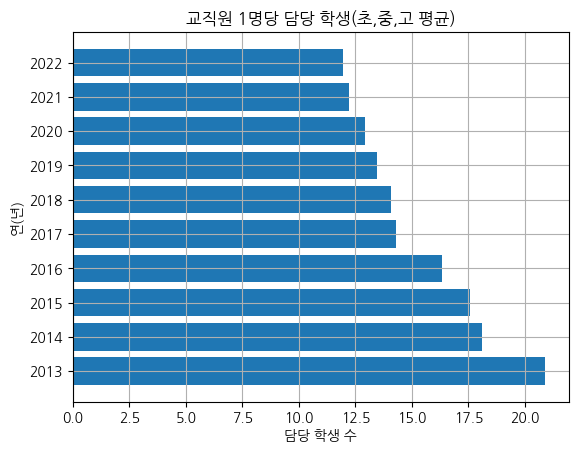

In [159]:
plt.barh(range(10), list((div2/div1).values))
plt.title("교직원 1명당 담당 학생(초,중,고 평균)")
plt.yticks(range(10), [i for i in range(2013,2023)])
plt.ylabel("연(년)")
plt.grid(True)
plt.xlabel("담당 학생 수")

In [ ]:
# 늘봄학교 운영 : https://www.yna.co.kr/view/AKR20240205104100530?input=1195m
# 교사정원 감축 : http://news.eduhope.net/25152
# 교육발전 특구 : https://n.news.naver.com/mnews/article/030/0003151743